In [1]:
#IMPORTING THE NECESSARY PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
#IMPORTING THE DATA
test = pd.read_csv("/Users/muralik/Desktop/Datasets/test.csv")
train = pd.read_csv("/Users/muralik/Desktop/Datasets/train.csv")

In [3]:
test.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


In [4]:
test.shape

(105, 14)

In [5]:
test.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [6]:
test.dtypes

ID           int64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [7]:
train.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [8]:
train.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
train.dtypes

ID           int64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [10]:
train.shape

(400, 15)

In [11]:
#CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT	MEDV

In [12]:
train.describe()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,3.757191,10.970000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525,22.475750
std,115.614301,9.155496,22.796261,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047,9.218611
min,0.000000,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,99.750000,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000,17.100000
50%,199.500000,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000,21.000000
75%,299.250000,3.543427,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000,25.000000
max,399.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
CRIM_IQR = train.CRIM.quantile(0.75) - train.CRIM.quantile(0.25)
LowerthresholdCRIM = train.CRIM.quantile(0.25) - (1.5 * CRIM_IQR)
UpperthresholdCRIM = train.CRIM.quantile(0.75) + (1.5 * CRIM_IQR)
UpperthresholdCRIM

8.74183875

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


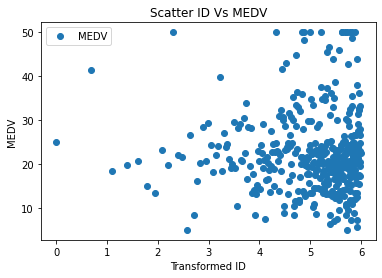

In [14]:
#Checking for linear relationship between ID and MEDV   - NO
train["Transformed ID"] = np.log(train["ID"])
train.plot(x="Transformed ID",y="MEDV",style="o")
plt.title("Scatter ID Vs MEDV")
plt.xlabel("Transformed ID")
plt.ylabel("MEDV")
plt.show()

In [15]:
train[["Transformed ID","MEDV"]].corr()

,Transformed ID,MEDV
Transformed ID,1.000000,-0.005981
MEDV,-0.005981,1.000000


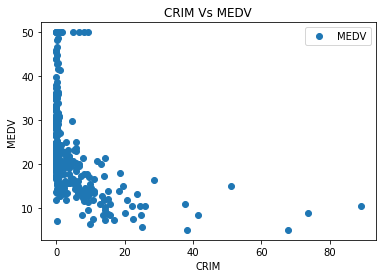

,CRIM,MEDV
CRIM,1.000000,-0.393693
MEDV,-0.393693,1.000000


In [16]:
#Checking for linear relationship between CRIM and MEDV   - YES
train.plot(x="CRIM",y="MEDV",style="o")
plt.title("CRIM Vs MEDV")
plt.xlabel("CRIM")
plt.ylabel("MEDV")
plt.show()
train[["CRIM","MEDV"]].corr()

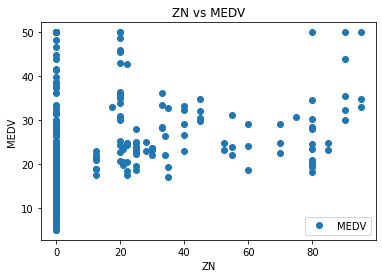

,ZN,MEDV
ZN,1.000000,0.336805
MEDV,0.336805,1.000000


In [17]:
#Checking for linear relationship between ZN and MEDV    - YES
train.plot(x="ZN",y="MEDV",style="o")
plt.title("ZN vs MEDV")
plt.xlabel("ZN")
plt.ylabel("MEDV")
plt.show()
train[["ZN","MEDV"]].corr()

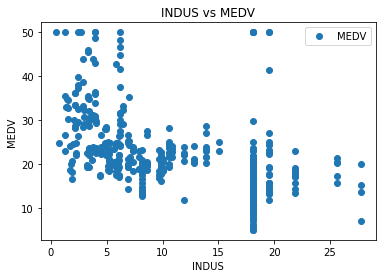

,INDUS,MEDV
INDUS,1.000000,-0.502898
MEDV,-0.502898,1.000000


In [18]:
#Checking for relationship between INDUS and MEDV   - YES
train.plot(x="INDUS",y="MEDV",style="o")
plt.title("INDUS vs MEDV")
plt.xlabel("INDUS")
plt.ylabel("MEDV")
plt.show()
train[["INDUS","MEDV"]].corr()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


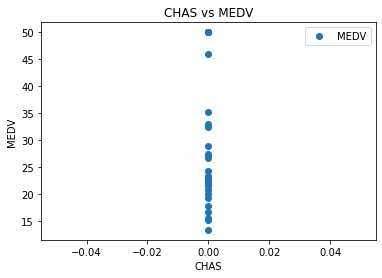

,Transformed CHAS,MEDV
Transformed CHAS,NaN,NaN
MEDV,NaN,1.0


In [19]:
#Checking for relationship between CHAS and MEDV  - No
train["Transformed CHAS"] = np.log(train["CHAS"])
train.plot(x="Transformed CHAS",y="MEDV",style="o")
plt.title("CHAS vs MEDV")
plt.xlabel("CHAS")
plt.ylabel("MEDV")
plt.show()
train[["Transformed CHAS","MEDV"]].corr()

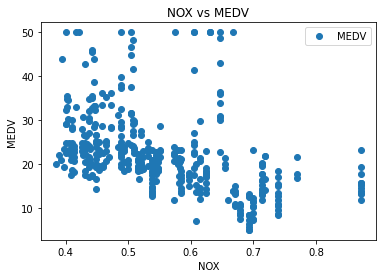

,NOX,MEDV
NOX,1.000000,-0.434271
MEDV,-0.434271,1.000000


In [20]:
#Checking for relationship between NOX and MEDV   - YES
train.plot(x="NOX",y="MEDV",style="o")
plt.title("NOX vs MEDV")
plt.xlabel("NOX")
plt.ylabel("MEDV")
plt.show()
train[["NOX","MEDV"]].corr()

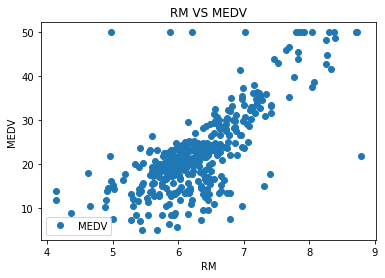

,RM,MEDV
RM,1.000000,0.721489
MEDV,0.721489,1.000000


In [21]:
#Checking for relationship between RM and MEDV   - YES
train.plot(x="RM",y="MEDV",style="o")
plt.title("RM VS MEDV")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()
train[["RM","MEDV"]].corr()

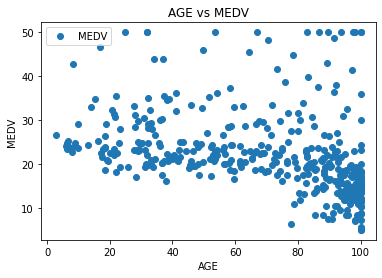

,AGE,MEDV
AGE,1.000000,-0.354106
MEDV,-0.354106,1.000000


In [22]:
#Checking for relationship between AGE vs MEDV  - YES
train.plot(x="AGE",y="MEDV",style="o")
plt.title("AGE vs MEDV")
plt.xlabel("AGE")
plt.ylabel("MEDV")
plt.show()
train[["AGE","MEDV"]].corr()

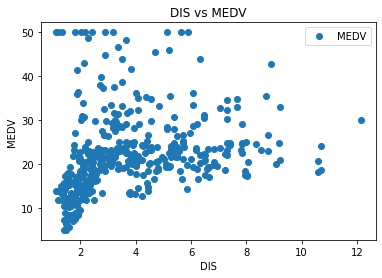

,DIS,MEDV
DIS,1.000000,0.235087
MEDV,0.235087,1.000000


In [23]:
#Checking for relationship between DIS and MEDV  -  YES
train.plot(x="DIS",y="MEDV",style="o")
plt.title("DIS vs MEDV")
plt.xlabel("DIS")
plt.ylabel("MEDV")
plt.show()
train[["DIS","MEDV"]].corr()

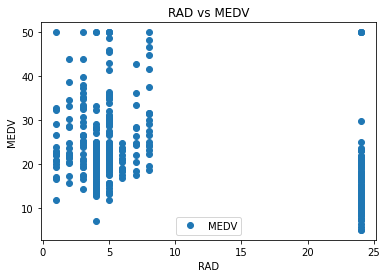

,RAD,MEDV
RAD,1.000000,-0.386922
MEDV,-0.386922,1.000000


In [24]:
#Checking for relationship between RAD and MEDV   -  YES
train.plot(x="RAD",y="MEDV",style="o")
plt.title("RAD vs MEDV")
plt.xlabel("RAD")
plt.ylabel("MEDV")
plt.show()
train[["RAD","MEDV"]].corr()

TAX	PTRATIO	B	LSTAT	

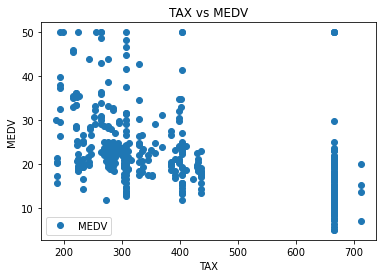

,TAX,MEDV
TAX,1.000000,-0.479308
MEDV,-0.479308,1.000000


In [25]:
#Checking for relationship between TAX and MEDV   -   YES
train.plot(x="TAX",y="MEDV",style="o")
plt.title("TAX vs MEDV")
plt.xlabel("TAX")
plt.ylabel("MEDV")
plt.show()
train[["TAX","MEDV"]].corr()

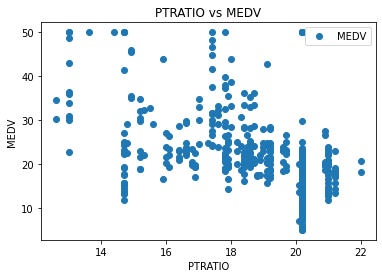

,PTRATIO,MEDV
PTRATIO,1.000000,-0.495904
MEDV,-0.495904,1.000000


In [26]:
#Checking for relationship between PTRATIO and MEDV   - YES
train.plot(x="PTRATIO",y="MEDV",style="o")
plt.title("PTRATIO vs MEDV")
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")
plt.show()
train[["PTRATIO","MEDV"]].corr()

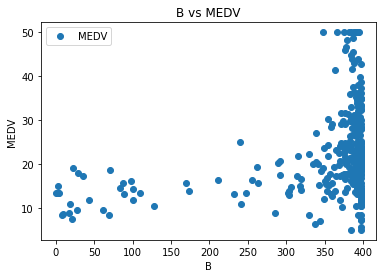

,B,MEDV
B,1.00000,0.31791
MEDV,0.31791,1.00000


In [27]:
#Checking for relationship between B and MEDV  - YES
train.plot(x="B",y="MEDV",style="o")
plt.title("B vs MEDV")
plt.xlabel("B")
plt.ylabel("MEDV")
plt.show()
train[["B","MEDV"]].corr()

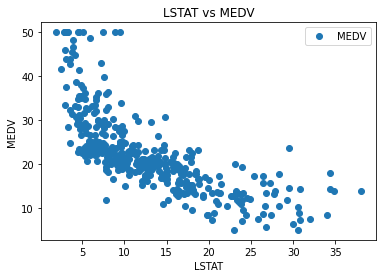

,LSTAT,MEDV
LSTAT,1.000000,-0.725281
MEDV,-0.725281,1.000000


In [28]:
#Checking for relationship between LSTAT and MEDV   - YES
train.plot(x="LSTAT",y="MEDV",style="o")
plt.title("LSTAT vs MEDV")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()
train[["LSTAT","MEDV"]].corr()

**SPLITTING THE DATA**

In [29]:
xval = train[["CRIM","ZN","INDUS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]].values
yval = train["MEDV"].values
xtest = test[["CRIM","ZN","INDUS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]].values

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(xval,yval,test_size=0.20,random_state=2)

**APPLYING THE MACHINE LEARNING ALGORITHM**

In [31]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train,Y_train)

LinearRegression()

In [42]:
from sklearn.preprocessing import PolynomialFeatures
Poly_reg = PolynomialFeatures(degree=2)
X_poly = Poly_reg.fit_transform(X_train)
Lin_reg = LinearRegression()
Lin_reg.fit(X_poly,Y_train)

LinearRegression()

In [32]:
coeff_df = pd.DataFrame(regr.coef_,["CRIM","ZN","INDUS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
                       , columns=["Coefficient"])
coeff_df

,Coefficient
CRIM,-0.120195
ZN,0.042907
INDUS,0.066228
NOX,-20.769440
RM,4.710722
AGE,-0.005107
DIS,-1.436631
RAD,0.371588
TAX,-0.016422
PTRATIO,-0.898910


In [33]:
y_pred = regr.predict(X_test)
y_pred

array([24.58168606, 22.18869935, 24.04965453,  6.48457441, 14.29182745,
       35.80597604, 12.98576945, 20.21492753, 13.04194341, 17.58496381,
       28.69929479, 23.7881149 , 25.64244001, 19.16835794, 24.95889383,
       44.03235096, 14.34743415, 19.85172953, 29.11230813, 32.71107111,
       25.00499823, 25.57320216, 13.88203358, 20.64729367, 23.99005513,
       23.47127941, 30.44746156, 22.90732915, 27.33774136,  7.7434155 ,
       10.51347991, 24.07826791, 25.26263746,  9.06729157, 11.26486048,
       18.00308538,  4.74903795, 20.07400485, 26.25902851, 19.88187429,
       34.71828008, 22.44209084, 27.99994903, 35.47963605, 23.40087245,
       21.05916004, 21.23319669, 28.95237775, 18.19885854, 27.13335319,
       11.51950568, 36.64034248, 19.55174973, 31.77724113, 14.79356077,
       18.35228731, 21.59006677, 21.18332935, 17.60897583, 22.47194015,
       28.70494974, 35.91340389, 29.41772817, 19.90582199, 11.65342651,
       21.73093183, 22.15067106, 41.5122282 , 29.96431654, 20.33

**PREDICTING USING POLYNOMIAL REGRESSION**

In [48]:
Y_pred_poly = Lin_reg.predict(Poly_reg.fit_transform(X_test))
print(np.concatenate((Y_pred_poly.reshape(len(Y_pred_poly),1),Y_test.reshape(len(Y_test),1)),1))

[[23.69200301 23.4       ]
 [21.9456327  20.        ]
 [20.21933198 20.5       ]
 [ 9.39031887 10.2       ]
 [14.15551746 13.5       ]
 [39.25338185 39.8       ]
 [11.39443016 13.6       ]
 [20.02156496 17.7       ]
 [ 8.17555881 15.6       ]
 [18.96688187 12.7       ]
 [25.42764878 23.3       ]
 [25.47799134 23.        ]
 [26.65536463 24.1       ]
 [13.12119794 10.9       ]
 [15.35603666 19.4       ]
 [56.24229336 50.        ]
 [13.94564295 15.6       ]
 [22.59263802 23.        ]
 [27.14308512 25.        ]
 [36.32082939 41.3       ]
 [23.35518396 24.7       ]
 [27.70710492 26.5       ]
 [16.85187554 18.5       ]
 [20.85584712 20.4       ]
 [22.10931098 22.7       ]
 [22.81671143 20.8       ]
 [34.68485796 29.4       ]
 [22.83399105 21.2       ]
 [23.46711576 23.9       ]
 [11.11068165 14.6       ]
 [25.03572547 14.4       ]
 [30.57954264 23.3       ]
 [23.31504393 24.        ]
 [13.08891845 17.8       ]
 [13.03650606 13.4       ]
 [18.90799022 18.2       ]
 [18.09254336 14.4       ]
 

In [34]:
data = [0.95577,0.0,8.14,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28]
y_pred = regr.predict([data])
y_pred

array([15.05534776])

In [35]:
train_regressor_prediction = regr.predict(X_test)

**LINEAR REGRESSION**

In [36]:
print("R2 Score:", r2_score(Y_test,train_regressor_prediction))

R2 Score: 0.655023036200902


**POLYNOMIAL REGRESSION**

In [49]:
print("R2 Score: ",r2_score(Y_test,Y_pred_poly))

R2 Score:  0.8743632253791772


**LASSO REGRESSION**

In [37]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1e-2,1,5,10,20,30,35,40,45,50,100]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring="neg_mean_squared_error",cv=5)
lasso_regressor.fit(xval,yval)
print("Best Parameter:",lasso_regressor.best_params_)
print("Best Score:",lasso_regressor.best_score_)

Best Parameter: {'alpha': 1e-08}
Best Score: -23.647898884360508


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.282e+03, tolerance: 2.900e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.220e+03, tolerance: 2.550e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.544e+03, toleranc

**RIDGE REGRESSION**

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1e-2,1,5,10,20,30,35,40,45,50,100]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=5)
ridge_regressor.fit(xval,yval)
print("Best Parameter:",ridge_regressor.best_params_)
print("Best Score:",ridge_regressor.best_score_)

Best Parameter: {'alpha': 0.01}
Best Score: -23.645876535227348
